In [74]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline


In [75]:
(X_train , y_train ),(X_test, y_test)= keras.datasets.mnist.load_data()

In [76]:
len(X_train)

60000

In [77]:
len(X_test)

10000

In [78]:
X_train[0].shape

(28, 28)

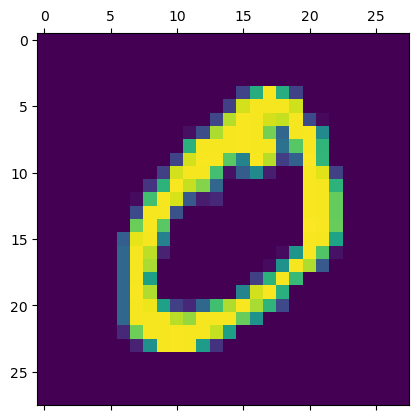

In [79]:
plt.matshow(X_train[1])

In [80]:
y_train[1]

0

# Scale the value

In [81]:
X_train = X_train / 255
X_test = X_test / 255

In [82]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [83]:
X_train.shape

(60000, 28, 28)

# x_train_flatten.shape

In [84]:
X_train_flattened =X_train.reshape(len(X_train),28*28 )
X_test_flattened =X_test.reshape(len(X_test),28*28 )

In [86]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# epoch = 5 activtion - sigmoid loss - sparse

In [87]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4710 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3034 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9257


#  epoch = 5 ,activtion - relu (very low accuracy), loss - mean

In [125]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='relu')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3098 - accuracy: 0.1315
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2828 - accuracy: 0.1078
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2925 - accuracy: 0.1030
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2841 - accuracy: 0.1067
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2709 - accuracy: 0.1126


In [101]:
y_predict = model.predict(X_test_flattened)

313/313 [==============================] - 0s 920us/step


In [103]:
y_predict[0]

array([5.7061454e-03, 4.9670628e-08, 1.9564984e-02, 9.6480101e-01,
       1.0325949e-03, 1.1928971e-01, 1.8816996e-07, 9.9972183e-01,
       8.1173450e-02, 6.8164909e-01], dtype=float32)

# it must be 7

In [105]:
y_test[0]

7

In [106]:
np.argmax(y_predict[0])

7

In [114]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

# confusion matrix

cm =tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(0.5, 47.7222222222222, 'Truth')

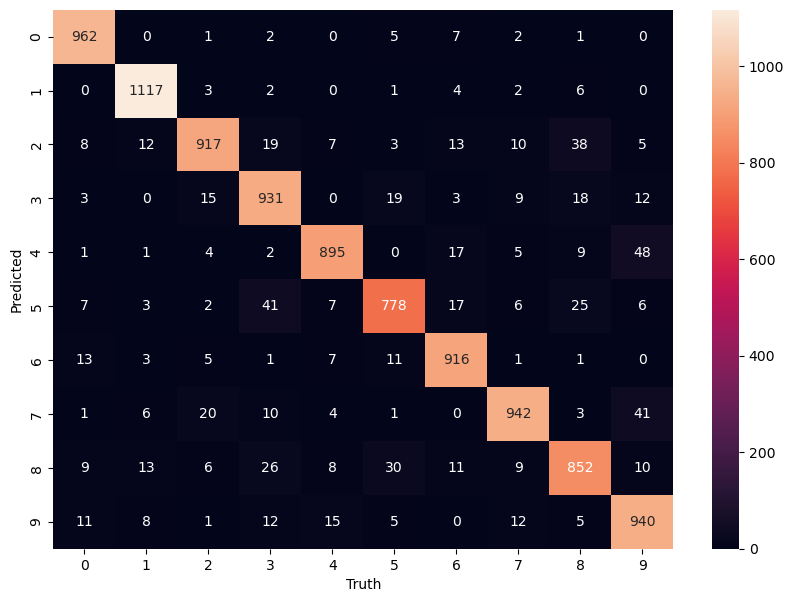

In [124]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Truth')


# Model with hidden layer

In [131]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
     keras.layers.Dense(10, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2656 - accuracy: 0.9241
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1218 - accuracy: 0.9637
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0854 - accuracy: 0.9748
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.9796
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9839
Epoch 6/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0414 - accuracy: 0.9874
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0350 - accuracy: 0.9891
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0274 - accuracy: 0.9915



# 2Hidden layer

In [132]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
        keras.layers.Dense(25, input_shape=(784,), activation='relu'),

    
     keras.layers.Dense(10, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2635 - accuracy: 0.9226
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1137 - accuracy: 0.9654
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0801 - accuracy: 0.9749
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0628 - accuracy: 0.9808
Epoch 5/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0496 - accuracy: 0.9843
Epoch 6/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0426 - accuracy: 0.9865
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0332 - accuracy: 0.9893
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - accuracy: 0.9908


# flatten array in model itself

In [137]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(25, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2737 - accuracy: 0.9196
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1157 - accuracy: 0.9652
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0822 - accuracy: 0.9753
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0634 - accuracy: 0.9801
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9842
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0439 - accuracy: 0.9861
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0340 - accuracy: 0.9891
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0294 - accuracy: 0.9904


# Maximum Accuracy =99.15%